## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
from tensorflow import keras
import itertools

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = keras.layers.Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = keras.layers.Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
DROPOUT_RATE = [0.1, 0.2, 0.4]
MLPS = [[512, 128], [1024, 512, 256, 128, 32]]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp, mlp in itertools.product(DROPOUT_RATE, MLPS):
    keras.backend.clear_session     # 把舊的 Graph 清掉
    print(f"dropout rate:{drp} mlp layers:{len(mlp)}")
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=mlp, drp_ratio=drp)
    model.summary()    

    opt = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer=opt)
    model.fit(x_train, y_train, 
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "exp-drp:%s layers:%s" % (str(drp), str(len(mlp)))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}            

dropout rate:0.1 mlp layers:2
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,640,330
Trainable params: 1,640,330
Non-trainable params: 0
_____________________

Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.1704 - accuracy: 0.5797 - val_loss: 1.3295 - val_accuracy: 0.5252
dropout rate:0.1 mlp layers:5
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 1024)              3146752   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               524800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer3 (De

196/196 [==============================] - 4s 19ms/step - loss: 1.1486 - accuracy: 0.5889 - val_loss: 1.3594 - val_accuracy: 0.5281
Epoch 44/50
196/196 [==============================] - 4s 18ms/step - loss: 1.1403 - accuracy: 0.5924 - val_loss: 1.3441 - val_accuracy: 0.5299
Epoch 45/50
196/196 [==============================] - 3s 18ms/step - loss: 1.1307 - accuracy: 0.5945 - val_loss: 1.3735 - val_accuracy: 0.5307
Epoch 46/50
196/196 [==============================] - 4s 18ms/step - loss: 1.1231 - accuracy: 0.5989 - val_loss: 1.3565 - val_accuracy: 0.5312
Epoch 47/50
196/196 [==============================] - 4s 20ms/step - loss: 1.1086 - accuracy: 0.6027 - val_loss: 1.3546 - val_accuracy: 0.5341
Epoch 48/50
196/196 [==============================] - 4s 18ms/step - loss: 1.1145 - accuracy: 0.6034 - val_loss: 1.3462 - val_accuracy: 0.5321
Epoch 49/50
196/196 [==============================] - 4s 18ms/step - loss: 1.0955 - accuracy: 0.6081 - val_loss: 1.3604 - val_accuracy: 0.5365
Epoc

Epoch 42/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4121 - accuracy: 0.4907 - val_loss: 1.4101 - val_accuracy: 0.5011
Epoch 43/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4025 - accuracy: 0.4979 - val_loss: 1.4184 - val_accuracy: 0.5016
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 1.4033 - accuracy: 0.4982 - val_loss: 1.4014 - val_accuracy: 0.5007
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 1.4036 - accuracy: 0.4957 - val_loss: 1.3938 - val_accuracy: 0.5041
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 1.3917 - accuracy: 0.4989 - val_loss: 1.3961 - val_accuracy: 0.5034
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 1.3856 - accuracy: 0.5010 - val_loss: 1.3964 - val_accuracy: 0.5071
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 1.3905 - accuracy: 0.5028 - val_loss: 1.3859 - val_accuracy:

196/196 [==============================] - 4s 18ms/step - loss: 1.4970 - accuracy: 0.4692 - val_loss: 1.4517 - val_accuracy: 0.4802
Epoch 36/50
196/196 [==============================] - 3s 18ms/step - loss: 1.4880 - accuracy: 0.4720 - val_loss: 1.4451 - val_accuracy: 0.4844
Epoch 37/50
196/196 [==============================] - 3s 18ms/step - loss: 1.4853 - accuracy: 0.4735 - val_loss: 1.4290 - val_accuracy: 0.4958
Epoch 38/50
196/196 [==============================] - 4s 18ms/step - loss: 1.4831 - accuracy: 0.4753 - val_loss: 1.4460 - val_accuracy: 0.4816
Epoch 39/50
196/196 [==============================] - 3s 18ms/step - loss: 1.4815 - accuracy: 0.4736 - val_loss: 1.4347 - val_accuracy: 0.4841
Epoch 40/50
196/196 [==============================] - 4s 18ms/step - loss: 1.4754 - accuracy: 0.4780 - val_loss: 1.4492 - val_accuracy: 0.4891
Epoch 41/50
196/196 [==============================] - 4s 18ms/step - loss: 1.4739 - accuracy: 0.4805 - val_loss: 1.4280 - val_accuracy: 0.4910
Epoc

Epoch 34/50
196/196 [==============================] - 2s 12ms/step - loss: 1.6731 - accuracy: 0.3945 - val_loss: 1.6041 - val_accuracy: 0.4505
Epoch 35/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6643 - accuracy: 0.3983 - val_loss: 1.5972 - val_accuracy: 0.4492
Epoch 36/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6641 - accuracy: 0.3989 - val_loss: 1.5961 - val_accuracy: 0.4504
Epoch 37/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6635 - accuracy: 0.3985 - val_loss: 1.5985 - val_accuracy: 0.4403
Epoch 38/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6592 - accuracy: 0.4003 - val_loss: 1.5996 - val_accuracy: 0.4392
Epoch 39/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6621 - accuracy: 0.3978 - val_loss: 1.6080 - val_accuracy: 0.4313
Epoch 40/50
196/196 [==============================] - 2s 11ms/step - loss: 1.6583 - accuracy: 0.4009 - val_loss: 1.5718 - val_accuracy:

196/196 [==============================] - 3s 18ms/step - loss: 1.9131 - accuracy: 0.2735 - val_loss: 1.9544 - val_accuracy: 0.2697
Epoch 28/50
196/196 [==============================] - 3s 18ms/step - loss: 1.9075 - accuracy: 0.2753 - val_loss: 1.9035 - val_accuracy: 0.2967
Epoch 29/50
196/196 [==============================] - 3s 18ms/step - loss: 1.9103 - accuracy: 0.2774 - val_loss: 1.9363 - val_accuracy: 0.2870
Epoch 30/50
196/196 [==============================] - 3s 18ms/step - loss: 1.9008 - accuracy: 0.2823 - val_loss: 1.8953 - val_accuracy: 0.3007
Epoch 31/50
196/196 [==============================] - 4s 18ms/step - loss: 1.9041 - accuracy: 0.2797 - val_loss: 1.8996 - val_accuracy: 0.3077
Epoch 32/50
196/196 [==============================] - 4s 18ms/step - loss: 1.9047 - accuracy: 0.2788 - val_loss: 1.9179 - val_accuracy: 0.2917
Epoch 33/50
196/196 [==============================] - 4s 18ms/step - loss: 1.8989 - accuracy: 0.2810 - val_loss: 1.8900 - val_accuracy: 0.2951
Epoc

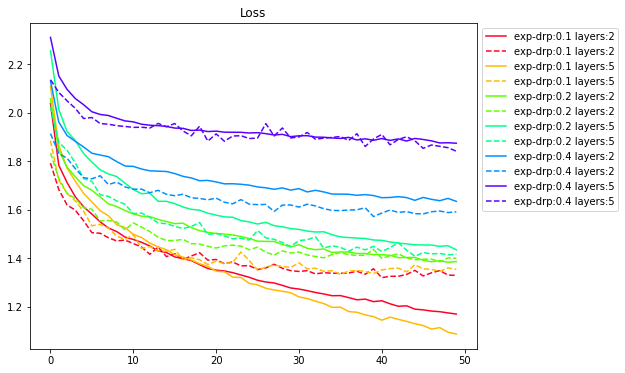

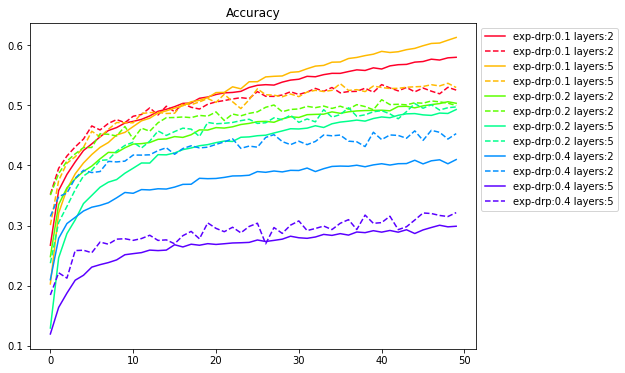

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()